<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/SimplestToyProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor(0.) tensor(0.)
tensor(0.) tensor(1.)
tensor(0.) tensor(2.)
tensor(0.) tensor(3.)
tensor(0.) tensor(4.)
tensor(0.) tensor(5.)
tensor(0.) tensor(6.)
tensor(0.) tensor(7.)
tensor(0.) tensor(8.)
tensor(0.) tensor(9.)
tensor(0.) tensor(10.)
tensor(0.) tensor(11.)
tensor(0.) tensor(12.)
tensor(0.) tensor(13.)
tensor(0.) tensor(14.)
tensor(0.) tensor(15.)
tensor(0.) tensor(16.)
tensor(0.) tensor(17.)
tensor(0.) tensor(18.)
tensor(0.) tensor(19.)
tensor(0.) tensor(20.)
tensor(0.) tensor(21.)
tensor(0.) tensor(22.)
tensor(0.) tensor(23.)
tensor(0.) tensor(24.)
tensor(0.) tensor(25.)
tensor(0.) tensor(26.)
tensor(0.) tensor(27.)
tensor(0.) tensor(28.)
tensor(0.) tensor(29.)
tensor(0.) tensor(30.)
tensor(0.) tensor(31.)
tensor(1.) tensor(0.)
tensor(1.) tensor(1.)
tensor(1.) tensor(2.)
tensor(1.) tensor(3.)


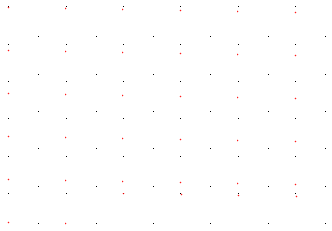

In [81]:
import torch
import numpy as np
import pylab as plt
from skimage import filters
import math

global numpoints
numpoints = 1
side = 32

rows = torch.zeros(32,32)
columns = torch.zeros(32,32)


for i in range(32):
    columns[:,i] = i
    rows[i,:] = i


def point_matrix():
    length = side**2
    canvas = torch.zeros((length,side, side))
    

    x = torch.zeros(length,numpoints) 
    y = torch.zeros(length,numpoints)
    assert x.shape == (length,numpoints)
    assert y.shape == (length,numpoints)
    
    points = torch.zeros(length,2)
    for j in range(side):
      for i in range(side):
        l = i*32+j
        canvas[l,i,j] = 1.0
        x[l] = i
        y[l] = j

        #points[l,:,0] = x[l,:]
        #points[l,:,1] = y[l,:]
        points[l,0] = i#modified for lstm discriminator
        points[l,1] = j#modified for lstm discriminator 
    
    
    return {
        'canvas': canvas, 
        'points':points.type(torch.FloatTensor)}


def plot_all( sample = None, model = None, labels = None):
    #img = sample[:,:].squeeze().cpu().numpy()
    img = np.zeros((32,32))
    img[1,1] = 1
    img[31,31] = 1
    plt.imshow(img, cmap=plt.cm.gray_r)
    if model != None:
        with torch.no_grad():
            global numpoints

            print("sample", sample.shape)
            pred = model(sample).view(1000,3)
            print('pred', pred.shape)
            predres = numpoints
            X = pred[:,0]
            Y = pred[:,1]
            
            s = [.001 for x in range(predres)]
            
            assert len(s) == predres
            c = ['red' for x in range(predres)]
            assert len(c) == predres
            Y = Y.cuda()
            X = X.cuda()
            print("type",type(X))
            ascatter = plt.scatter(Y.cpu().numpy(),X.cpu().numpy(),s = s,c = c)
            plt.gca().add_artist(ascatter)
    else:
        #print(labels.shape)

        X = labels[0]
        Y = labels[1]
        #print(X.shape)
        #print(Y.shape)
        print(X,Y)
        s = [.1 for x in range(numpoints)]
        #print(len(s))
        c = ['red' for x in range(numpoints)]
        #print(len(c))
        ascatter = plt.scatter(X,Y,s = s,c = c)
        plt.gca().add_artist(ascatter)

class PointDataset(torch.utils.data.Dataset):
    """Donut dataset."""
    def __init__(self):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.length = side**2
        self.values = point_matrix()
        assert self.values['canvas'].shape[0] == self.length
        assert self.values['points'].shape[0] == self.length

    def __len__(self):
        return self.length


    def __getitem__(self, idx):
        canvas = self.values["canvas"]
        
        canvas = canvas[idx,:,:]
        assert canvas.shape == (side,side)
        points = self.values["points"]
        points = points[idx,:]
        return canvas, points
    
    @staticmethod
    def displayCanvas(title,dataset, model):
        #model.setBatchSize(batch_size = 1)
        for i in range(36):
            sample, labels = dataset[i]
            plt.subplot(6,6,i+1)
            plot_all(sample = sample,model=model, labels = labels)
            plt.axis('off')
        plt.savefig(title,dpi=600)

dataset = PointDataset()
PointDataset.displayCanvas('donut.png',dataset, model = None)


In [82]:
d = dataset

In [85]:
l=1
c = d[l][0]
print(d[l][1][0],d[l][1][1])
i= (int)(d[l][1][0].item())
j=(int)(d[l][1][1].item())
print(i,j)

print(c[-(j+1),i])
print(d[l][1])
print(c)

tensor(0.) tensor(1.)
0 1
tensor(0.)
tensor([0., 1.])
tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [21]:
d[0][1]

tensor([0., 0.])

In [47]:
a = torch.zeros(32,32)

In [50]:
a[31,0]=1#first is j, second is i

In [51]:
print(a)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])
